In [1]:
#variabila care salveaza path-ul catre imagine
#file_path = './Images/Binary Edges Images/doubleCircles.jpg' #this one will get automated with GUI
file_path = 'C:/Users/AmicuLL/Desktop/Proiect Python/Images/Non-Binary/imagine.png'

In [2]:
#Se importa o functie locala
#import GUI as GUIWindow
#Momentan nu incarc codul degeaba

In [3]:
#Importez functiile necesare transformatei Hough
import numpy as np
import matplotlib.pyplot as plt
import cv2

Functia displayCircles, cum ii spune si numele, afiseaza cercuri :)))

Practic, in functia asta, desenez cercurile detectate peste imaginea originala.

In [4]:
def displayCircles(detectedCircles, img):
    print(f'\n\n')
    #detectedCircles is the accumulator
    #fig = plt.figure()
    fig, ax = plt.subplots()
    plt.imshow(img)
    circleCoordinates = np.argwhere(detectedCircles)                                 
    circle = []
    for r,x,y in circleCoordinates:
        circle.append(plt.Circle((y,x),r,color=(1,0,0),fill=False))
        ax.add_patch(circle[-1])
        ax.add_patch(plt.Circle((y,x),1,color=(0,0,1),fill=True))
        #cv2.circle(img, (x,y), r, (255, 0, 0), 2)
        #cv2.circle(img, (x,y), 1, (0, 0, 255), 1)
    #cv2.imshow('Circle Detection', img)
    plt.show()

Long story short: desenez cercuri de raza data (schite de cercuri) si dupa trec pe imaginea cu muchii si le aplic pe rand unul peste altul. 

In [5]:
def detectCircles(img,threshold,region,radius = None):
    (H,W) = img.shape #Img dim
    if radius == None: #I don't like this implementation, but it will do for now
        rMax = np.max((H,W))
        rMin = 3
    else:
        [rMax,rMin] = radius

    R = rMax - rMin

    
    A = np.zeros((rMax,H+2*rMax,W+2*rMax)) #Accumulator array initializing. This one is for "blueprints" of circles. First value is the radius, second is the x coords, the third and the last is y coords.
                                           #3D array bcs we have a variable radius. Coords for x&y are 2*R to overcome the warning/errors of overflow/boundaries exceed
    
    B = np.zeros((rMax,H+2*rMax,W+2*rMax)) #Same here as for blueprints, but this one is with the DETECTED CIRCLES :) 
    
    theta = np.arange(0,360)*np.pi/180 #precomputing the angles as they are used for every point detected in edges matrix (otherwise we waste computing power) //3x faster :)))
    edges = np.argwhere(img[:,:])  #extracting non-zero values from img edges
    for value in range(R): #at first i used a vector R = [rMin rMax], but is it a good habit to use range, just to get used? 
        print(f"{value+1} out of {R} \t\t[{'='*(value+1):<{R}}] {((value+1)/R*100):.2f}%", end='\r', flush=True)

        r = rMin+value # ex: rMin = 10... for every radius, should trace a circle in the radius limits

        blueprint = np.zeros((2*(r+1),2*(r+1))) #i'm done with "zeroes"... pds be like.. all day: TREAPTA UNITATE!
        (h,w) = (r+1,r+1) #Finding(kinda searching?) the center of the blueprint|Saving the center
        
        for unghi in theta: #Nu mi-a venit angle cand scriam codul, asa ca si asta e ultimul comentariu in romana! Va multumesc :)
            x = int(np.round(r*np.cos(unghi))) #"edges" of the created circles (bcs pixels are integers, it has to be rounded... now, the circle might not be perfect :)))) no one cars for 0.5px )
            y = int(np.round(r*np.sin(unghi))) #same for y coords for its edge
            blueprint[h+x,w+y] = 1 #incrementing the poz of the circle created. 1 = it is, 0 it isn't
        constant = np.argwhere(blueprint).shape[0] #shape[0] = rows, non-zeo values
        
        for x,y in edges: #for each edge pixel detected in img, the blueprinted circle is centering on that pixel 
            X = [x-h+rMax,x+h+rMax] #Calculating the extreme value of X
            Y = [y-w+rMax,y+w+rMax] #same...
            A[r,X[0]:X[1],Y[0]:Y[1]] += blueprint #adds the circle to accumulator
        A[r][A[r]<threshold*constant/r] = 0 #checking.. supress the threshold?, it's 0

    for r,x,y in np.argwhere(A): #Now we got all the circles "drawed" on accumulator for blueprints
        temp = A[r-region:r+region,x-region:x+region,y-region:y+region] #As i found more intuitive to check for circles in a region in img (let's say, middle, top left ect), i substract the region for ?x:y
        try:
            p,a,b = np.unravel_index(np.argmax(temp),temp.shape) #unravel_index = Converts a flat index or array of flat indices into a tuple of coordinate arrays. p = radius, a=x, b=y and getting the max value
        except:
            continue
        B[r+(p-region),x+(a-region),y+(b-region)] = 1 #Here happens the magic. If it's 1, there was a circle detected.

    return B[:,rMax:-rMax,rMax:-rMax] #returning the acc array


Mai jos deschid imaginea si o convertesc in gray scale pentru ca, nu am nevoie de al 3-lea element.

In [6]:
img = cv2.imread(file_path)

#this script should work with normal images :) is pretty fast :D
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
edges = cv2.Canny(image=img_blur, threshold1=40, threshold2=100) # Canny Edge Detection
#edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Muchii', edges)
#cv2.waitKey(0)

var = edges

In [7]:
#Asta trebuie rulata ca sa se porneasca codul

#Momentan nu e folosit GUI-ul la codul actual asa ca trebuie pornita functia cu o linie mai jos
#GUIWindow.GUI.window.mainloop()

Doar raza este optionala... restul variabilelor sunt obligatorii

130 out of 130 		[==================================================================================================================================] 100.00%




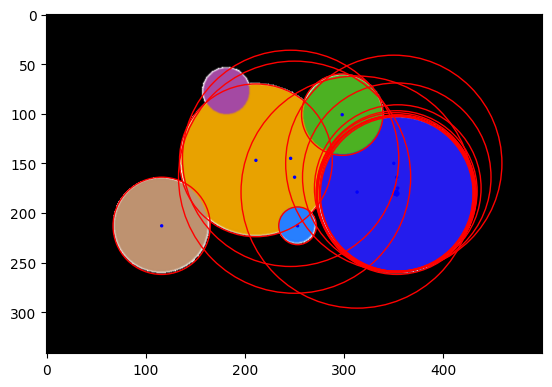

In [8]:
threshold = 14 #20
rMax = 140 #140
rMin = 10 #10

var = detectCircles(var,threshold,15,radius=[rMax,rMin]) #tre sa te joci cu thresholdu'... Nu am chef sa implementez un cod separat pentru calcularea celui mai bun threshold (prag optim... cv de genu)
displayCircles(var, img)